<a href="https://colab.research.google.com/github/yashyaks/ML-Playground/blob/main/ML2/ML2_Lab3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# **Gradient descent**


In [ ]:
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',  # Changed 'adam' to 'sgd'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and collect history
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 0.8481 - accuracy: 0.7526 - val_loss: 0.2433 - val_accuracy: 0.9280
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2098 - accuracy: 0.9362 - val_loss: 0.1614 - val_accuracy: 0.9500
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.1029 - val_accuracy: 0.9694
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.1060 - accuracy: 0.9670 - val_loss: 0.0919 - val_accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0903 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


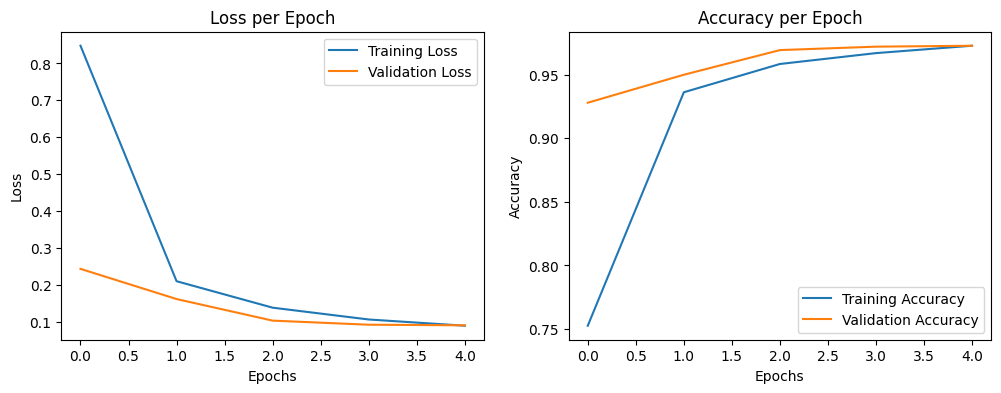

313/313 [==============================] - 3s 8ms/step - loss: 0.0903 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


In [ ]:

# Plot the loss and accuracy per epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# **Adam Optimizer**



In [ ]:

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')




Epoch 1/5
938/938 [==============================] - 49s 51ms/step - loss: 0.1790 - accuracy: 0.9456 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0290 - val_accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0221 - val_accuracy: 0.9928
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0302 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


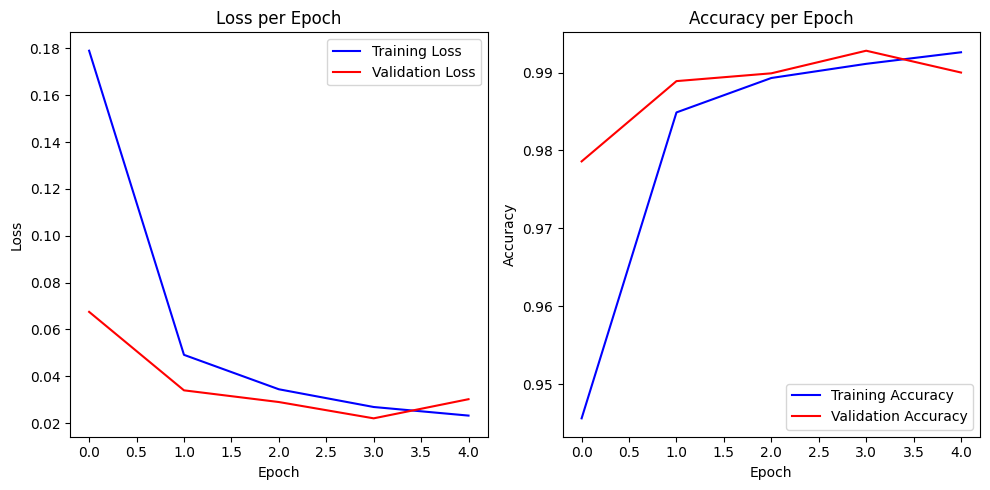

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Stochastic Gradient descent**

In [ ]:
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,  # Changed to use SGD
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 35s 55ms/step - loss: 1.1281 - accuracy: 0.6751 - val_loss: 0.7561 - val_accuracy: 0.7552
Epoch 2/5
629/629 [==============================] - 34s 54ms/step - loss: 0.2892 - accuracy: 0.9133 - val_loss: 0.2206 - val_accuracy: 0.9331
Epoch 3/5
629/629 [==============================] - 34s 55ms/step - loss: 0.1875 - accuracy: 0.9434 - val_loss: 0.1659 - val_accuracy: 0.9499
Epoch 4/5
629/629 [==============================] - 35s 56ms/step - loss: 0.1415 - accuracy: 0.9556 - val_loss: 0.1321 - val_accuracy: 0.9602
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0972 - accuracy: 0.9712
Test accuracy: 0.9711999893188477


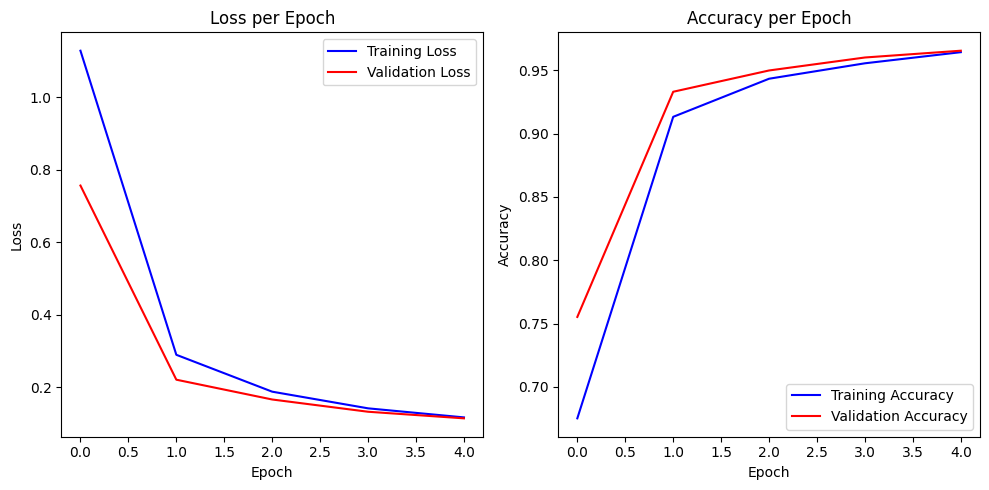

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Stochastic Gradient descent with momentum**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer,  # Use SGD with momentum
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 36s 57ms/step - loss: 0.3838 - accuracy: 0.8774 - val_loss: 0.1535 - val_accuracy: 0.9514
Epoch 2/5
629/629 [==============================] - 34s 54ms/step - loss: 0.0833 - accuracy: 0.9731 - val_loss: 0.0696 - val_accuracy: 0.9783
Epoch 3/5
629/629 [==============================] - 34s 55ms/step - loss: 0.0559 - accuracy: 0.9820 - val_loss: 0.0713 - val_accuracy: 0.9778
Epoch 4/5
629/629 [==============================] - 35s 56ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0603 - val_accuracy: 0.9831
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0525 - accuracy: 0.9828
Test accuracy: 0.9828000068664551


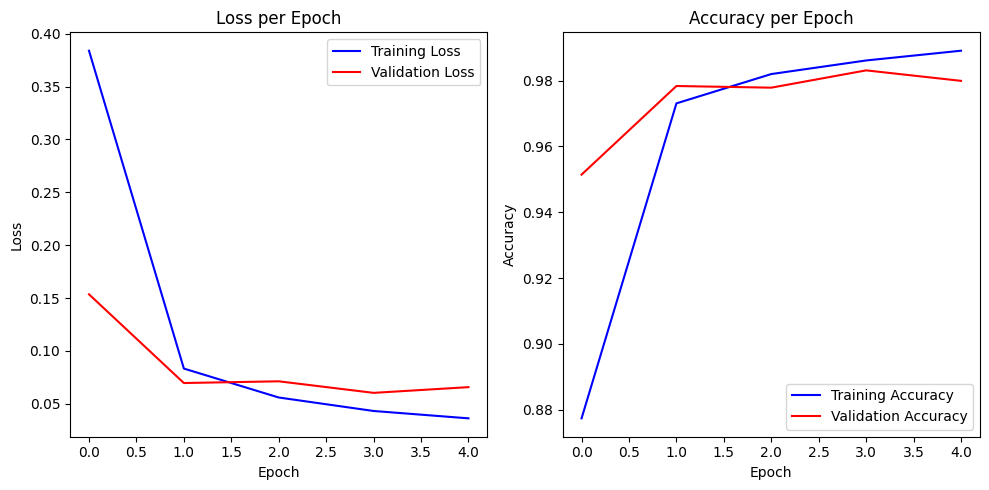

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Mini batch gradient descent**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Use Stochastic Gradient Descent (minibatch gradient descent by default)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,  # Use SGD (minibatch gradient descent by default)
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33 , epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 37s 57ms/step - loss: 1.1600 - accuracy: 0.6681 - val_loss: 0.6344 - val_accuracy: 0.7898
Epoch 2/5
629/629 [==============================] - 34s 54ms/step - loss: 0.3058 - accuracy: 0.9069 - val_loss: 0.2761 - val_accuracy: 0.9137
Epoch 3/5
629/629 [==============================] - 33s 53ms/step - loss: 0.2006 - accuracy: 0.9392 - val_loss: 0.1778 - val_accuracy: 0.9451
Epoch 4/5
629/629 [==============================] - 34s 55ms/step - loss: 0.1496 - accuracy: 0.9545 - val_loss: 0.2736 - val_accuracy: 0.9115
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.1035 - accuracy: 0.9690
Test accuracy: 0.968999981880188


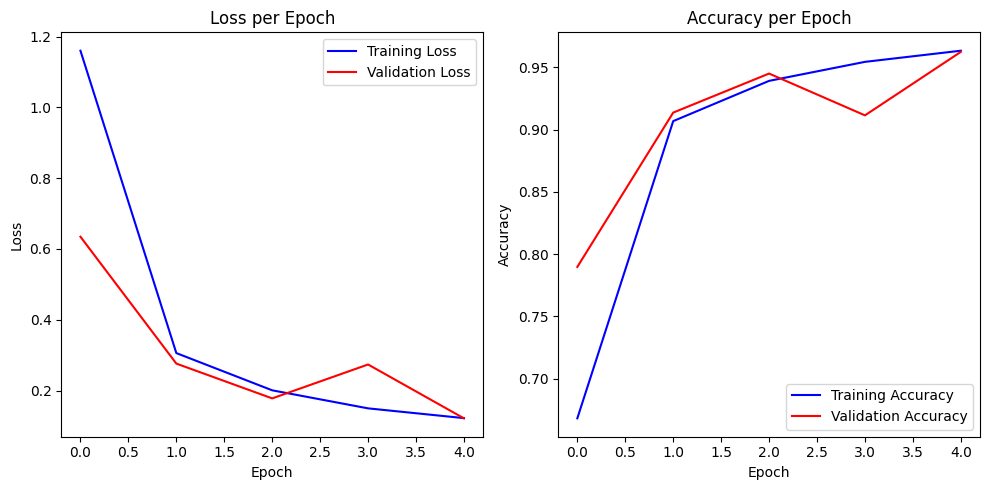

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Adagrad**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Use Adagrad as optimizer
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)

model.compile(optimizer=optimizer,  # Use Adagrad
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 34s 53ms/step - loss: 0.6161 - accuracy: 0.8140 - val_loss: 0.2099 - val_accuracy: 0.9350
Epoch 2/5
629/629 [==============================] - 35s 56ms/step - loss: 0.1605 - accuracy: 0.9516 - val_loss: 0.1267 - val_accuracy: 0.9625
Epoch 3/5
629/629 [==============================] - 35s 56ms/step - loss: 0.1073 - accuracy: 0.9668 - val_loss: 0.1343 - val_accuracy: 0.9597
Epoch 4/5
629/629 [==============================] - 35s 55ms/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.0895 - val_accuracy: 0.9735
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0635 - accuracy: 0.9793
Test accuracy: 0.9793000221252441


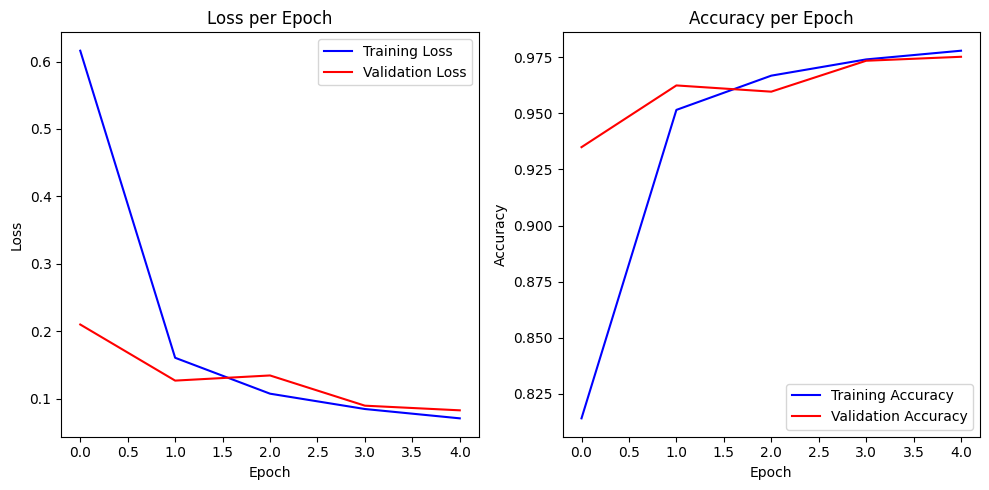

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **RMSProp**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Use RMSProp as optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer,  # Use RMSProp
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 35s 55ms/step - loss: 0.2363 - accuracy: 0.9256 - val_loss: 0.1670 - val_accuracy: 0.9494
Epoch 2/5
629/629 [==============================] - 34s 55ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0620 - val_accuracy: 0.9810
Epoch 3/5
629/629 [==============================] - 34s 54ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0500 - val_accuracy: 0.9857
Epoch 4/5
629/629 [==============================] - 34s 54ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0506 - val_accuracy: 0.9868
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0299 - accuracy: 0.9905
Test accuracy: 0.9904999732971191


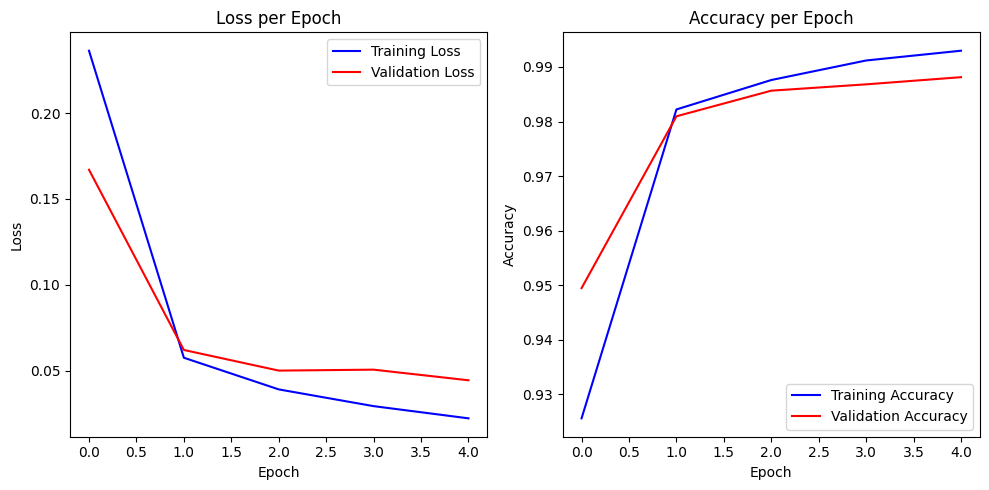

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **AdaDelta**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Use AdaDelta as optimizer
optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)

model.compile(optimizer=optimizer,  # Use AdaDelta
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,validation_split=0.33, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
629/629 [==============================] - 35s 54ms/step - loss: 0.2407 - accuracy: 0.9240 - val_loss: 0.1409 - val_accuracy: 0.9562
Epoch 2/5
629/629 [==============================] - 36s 57ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0625 - val_accuracy: 0.9808
Epoch 3/5
629/629 [==============================] - 35s 55ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 4/5
629/629 [==============================] - 35s 56ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0352 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


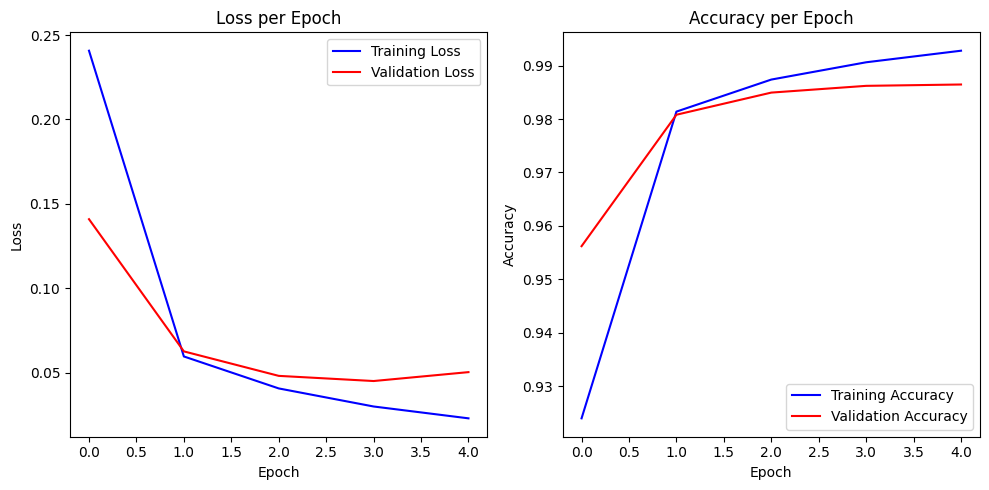

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()